**Import das bibliotecas utilizadas ao longo da lista**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# **Problema 1 - Diferenças centradas e derivada**

In [2]:
def f(xi):
  return 1+(1/2)*math.tanh(2*xi)

x = np.linspace(-2, 2, 100)
h = 1e-5

O valor de h = 1e-5 foi escolhido para otimização das contas, seguindo o recomendado pelo Newmann pg192. Adicionamos então uma lista dfdx para armazenar os 100 valores da derivada da função no intervalo de -2 a 2:

In [3]:
dfdx = []
for value in x:
  dfdx.append((f(value+h/2)-f(value-h/2))/h)

Sabendo que a derivada da tanh(2x) é 2(1-tanh(x)^2), temos a forma analítica para derivada: 1-((e^4x-1)/(e^4x+1))^2. Calculamos então as mesmas 100 derivadas no mesmo intervalo de -2 a 2 mas agora usando essa forma analítica:

In [4]:
def f_anal(xi):
  num = np.exp(4*xi)-1
  den = np.exp(4*xi)+1
  return 1-(num/den)**2

dfdx_anal = []
for value in x:
  dfdx_anal.append(f_anal(value))

Plotando o gráfico **por essas derivadas da função** (linha azul) e **pela forma analítica** (pontos vermelhos):

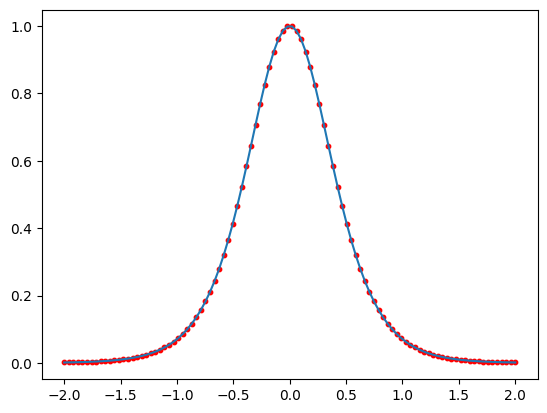

In [5]:
plt.plot(x, dfdx)
plt.scatter(x, dfdx_anal, s=10, color='red')
plt.show()

# **Problema 2 - Derivadas e ordens de aproximação**

**a)** Primeiro criamos dois arrays para armazenas os coeficientes da **Tabela 5.1**. Os **'coeffs_dg3'** que multiplicam as funções por fora e os **'coeffs_hs'** que são os coeficientes dos argumentos dessas mesmas respectivas funções.

Criamos a função **func_dg3** que recebe como argumento o array x (-2, 2) e **um valor único de h** e retorna uma **lista** com os valores das **derivadas no intervalo de x, usando o h do argumento.**

In [91]:
def f2(xi):
  return 1+(1/2)*math.tanh(2*xi)

def func_dg3(x2, h):

  coeffs_dg3 = np.array([1/24, -27/24, 27/24, -1/24])
  coeffs_hs = np.array([-3/2, -1/2, 1/2, 3/2])

  dfdx2_all = []

  for value in x2:

    dfdx2_value = 0

    for coef_dg3, coef_h in zip(coeffs_dg3, coeffs_hs):
      func = (coef_dg3 * f2(value + h * coef_h))/h
      dfdx2_value += func

    # for i in range(4):
    #   func = (coeffs_dg3[i]*f2(value + coeffs_hs[i]*h))/h
    #   dfdx2_value += func

    dfdx2_all.append(dfdx2_value)

  return dfdx2_all

In [92]:
x2 = np.linspace(-2, 2, 100)
h = 1e-5

lst = func_dg3(x2, h)

print(lst[:5])

[0.0013409506746029365, 0.0015759800767227716, 0.0018521650158618286, 0.002176697651975701, 0.0025580213437024213]


Plotando essas derivadas da função **pela aproximação de ordem 3** (linha azul) e **pela forma analítica** de anteriormente (pontos vermelhos):

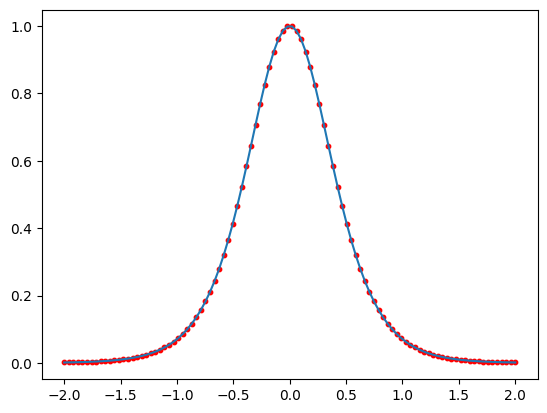

In [93]:
plt.scatter(x, dfdx_anal, s=10, color='red')
plt.plot(x2, lst)
plt.show()

**b)** para x = 0, a tangente hiperbólica zera, logo **f(x) = 1 + (1/2)*tanh(2x)**, então **f(0) = 1**.

Criamos então três funções, uma é a que vai **verificar o h que da o menor erro**, outra que **calcula a derivada** e outra que **calcula a propria funcao**. estamos utilizando **np.argmin(array)** para pegar o índice do menor valor dentro do array. Como os **for** trabalham de índice em índice de forma crescente, sabemos que o índice retornado por **np.argmin(array)** será o mesmo índice do array de h's.

In [105]:
def fb(xi):
  return 1+(1/2)*math.tanh(2*xi)

def derivada(h):
  return (fb(0+h/2)-fb(0-h/2))/h

def funcao_verif_h(hs):

  # qual h da o menor 1 - dfdxb

  erros = []
  for h in hs:
    erros.append(abs(1-derivada(h)))

  # usando np.argmin(array) para pegar o índice do menor valor

  indice = np.argmin(erros)
  return indice

In [106]:
hs = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])

indice = funcao_verif_h(hs)

print(indice)

4


Para mostrar a **validade do processo** vamos trocar a sequencia dos argumentos do array **hs** e printar as posições do h que minimiza o erro.

 Como podemos perceber sempre encontramos o **índice respectivo ao h = 1e-6:**

In [107]:
hs2 = np.array([1e-6, 1e-4, 1e-3, 1e-5, 1e-2, 1e-7])
hs3 = np.array([1e-7, 1e-3, 1e-6, 1e-5, 1e-4, 1e-2])

indice2 = funcao_verif_h(hs2)
indice3 = funcao_verif_h(hs3)

print(f'indice2: {indice2} e indice3: {indice3}')

indice2: 0 e indice3: 2


**c)** Como sabemos, a função **func_dg3()** usada anteriormente calcula a derivada usando uma aproximação de ordem 3, logo utilizaremos a mesma para calcular a derivada da **função para cada h em hs**. Assim utilizando **funcao_verif_h** que criamos, veremos o indice (e valor) do h que minimiza o erro:


In [110]:
def fb(xi):
  return 1+(1/2)*math.tanh(2*xi)

def funcao_verif_hdg3(hs):

  # qual h da o menor 1 - dfdxb
  x3 = np.array([0])

  erros = []
  for h in hs:
    temp = func_dg3(x3, h)

    erros.append(abs(1-temp[0]))

  # usando np.argmin(array) para pegar o índice do menor valor

  indice = np.argmin(erros)
  return indice

In [112]:
hs_dg3 = np.array([1e-2, 1e-6, 1e-4, 1e-5, 1e-3, 1e-7])

indice_dg3 = funcao_verif_hdg3(hs_dg3)

print(f'h que minimiza: {hs_dg3[indice_dg3]}')

h que minimiza: 0.0001


Como vemos a minimização do erro neste caso ocorre para **h = 1e-4**, ou seja, um h maior do que o anterior.

A explicação para isso é que quando olhamos para **Tabela 5.1**, vemos que ao comparar os graus pares e ímpares, eles têm o erro proporcional à mesma ordem de h, **porém os graus pares têm coeficientes menores multiplicando as funções**. Além disso os graus ímpares **possuem amostras em pontos intermediários** enquanto os graus pares anteriores não.

# **Problema 3 - Derivadas e gráficos**

# **Problema 4 - Campo elétrico de uma distribuicao de cargas**